# <b> <p align="center"> <span style="color: #DCC43C"> PYTORCH PAPER REPLICATING <span> </p> </b>
### <b> <p align="center"> <span style="color: #BFF0FF"> 2<sup>nd</sup> PROJECT <span> </p> </b>

we're going to be **replicating a machine learning research paper** and creating a Vision Transformer (ViT) from scratch using PyTorch.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-applying-vit-to-food-vision-mini.png" alt="appyling the vision transformer architecture to FoodVision mini" width=900/>

*For Project 2 we're going to focus on recreating the Vision Transformer (ViT) computer vision architecture and applying it to our FoodVision Mini problem to classify different images of pizza, steak and sushi.*

## What is paper replicating?

It's no secret machine learning is advancing fast.

Many of these advances get published in machine learning research papers.

And the goal of **paper replicating** is to replicate these advances with code so you can use the techniques for your own problem.

For example, let's say a new model architecture gets released that performs better than any other architecture before on various benchmarks, wouldn't it be nice to try that architecture on your own problems?

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-what-is-paper-replicating-images-math-text-to-code.png" alt="paper replicating involves turning a machine learning reserch paper comprised of images/diagrams, text and math into usable code" width=1000/>

*Machine learning paper replicating involves turning a machine learning paper comprised of images/diagrams, math and text into usable code and in our case, usable PyTorch code. Diagram, math equations and text from the [ViT paper](https://arxiv.org/abs/2010.11929).*

## What is a machine learning research paper?

A machine learning research paper is a scientific paper that details findings of a research group on a specific area.

The contents of a machine learning research paper can vary from paper to paper but they generally follow the structure:

| **Section** | **Contents** |
| ----- | ----- |
| **Abstract** | An overview/summary of the paper's main findings/contributions. |
| **Introduction** | What's the paper's main problem and details of previous methods used to try and solve it. |
| **Method** | How did the researchers go about conducting their research? For example, what model(s), data sources, training setups were used? |
| **Results** | What are the outcomes of the paper? If a new type of model or training setup was used, how did the results of findings compare to previous works? (this is where **experiment tracking** comes in handy) |
| **Conclusion** | What are the limitations of the suggested methods? What are some next steps for the research community? |
| **References** | What resources/other papers did the researchers look at to build their own body of work? |
| **Appendix** | Are there any extra resources/findings to look at that weren't included in any of the above sections? |

## Why replicate a machine learning research paper?

A machine learning research paper is often a presentation of months of work and experiments done by some of the best machine learning teams in the world condensed into a few pages of text.

And if these experiments lead to better results in an area related to the problem you're working on, it'd be nice to check them out.

Also, replicating the work of others is a fantastic way to practice your skills.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-george-hotz-quote.png" width=600 alt="george hotz quote saying to get better at being a machine learning engineer, download a paper, implement it and keep going until you have skills"/>

*George Hotz is founder of [comma.ai](https://comma.ai/), a self-driving car company and livestreams machine learning coding on [Twitch](https://www.twitch.tv/georgehotz) and those videos get posted in full to [YouTube](https://www.youtube.com/c/georgehotzarchive). I pulled this quote from one of his livestreams. The "٭" is to note that machine learning engineering often involves the extra step(s) of preprocessing data and making your models available for others to use (deployment).*
    
When you first start trying to replicate research papers, you'll likely be overwhelmed.

That's normal.

Research teams spend weeks, months and sometimes years creating these works so it makes sense if it takes you sometime to even read let alone reproduce the works.

Replicating research is such a tough problem, phenomenal machine learning libraries and tools such as, [HuggingFace](https://huggingface.co/), [PyTorch Image Models](https://github.com/rwightman/pytorch-image-models) (`timm` library) and [fast.ai](https://www.fast.ai/) have been born out of making machine learning research more accessible.

## Where can you find code examples for machine learning research papers?

One of the first things you'll notice when it comes to machine learning research is: there's a lot of it.

So beware, trying to stay on top of it is like trying to outrun a hamster wheel.

Follow your interest, pick a few things that stand out to you.

In saying this, there are several places to find and read machine learning research papers (and code):

| **Resource** | **What is it?** |
| ----- | ----- |
| [arXiv](https://arxiv.org/) | Pronounced "archive", arXiv is a free and open resource for reading technical articles on everything from physics to computer science (inlcuding machine learning). |
| [AK Twitter](https://twitter.com/_akhaliq) | The AK Twitter account publishes machine learning research highlights, often with live demos almost every day. I don't understand 9/10 posts but I find it fun to explore every so often. |
| [Papers with Code](https://paperswithcode.com/) | A curated collection of trending, active and greatest machine learning papers, many of which include code resources attached. Also includes a collection of common machine learning datasets, benchmarks and current state-of-the-art models. |
| [lucidrains' `vit-pytorch` GitHub repository](https://github.com/lucidrains/vit-pytorch) | Less of a place to find research papers and more of an example of what paper replicating with code on a larger-scale and with a specific focus looks like. The `vit-pytorch` repository is a collection of Vision Transformer model architectures from various research papers replicated with PyTorch code (much of the inspiration for this notebook was gathered from this repository). |

> **Note:** This list is far from exhaustive. I only list a few places, the ones I use most frequently personally. So beware the bias. However, I've noticed that even this short list often sully satisfies my needs for knowing what's going on in the field. Any more and I might go crazy.

## 0. Getting Setup


In [1]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)

2.3.0
0.18.0


make sure you've got the latest versions.

In [2]:
import matplotlib.pyplot as plt
from torch import nn
from torchvision import transforms

In [3]:
# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

In [4]:
# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/ShafaetUllah032/DL_with_PyTorch.git
    from going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

Get ready with device agnostics

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1.Get Data

Since we are working with mini version of  data [food 101](https://paperswithcode.com/dataset/food-101). We first need to get the data of only 3 classes modified by : [mrdbourke
](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi.zip)

Let's get the data with the module `get_data.py`.

In [8]:
from going_modular import get_data

train_dir,test_dir=get_data.get_data(url="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                                     path="demo",
                                     sub_folder="three_case")



path_exists , skip creating .....


(WindowsPath('demo/three_case/train'), WindowsPath('demo/three_case/test'))

## 2. Create Dataset and DataLoaders

As we get the data now for further implementation let's turns the data into dataloader. 

To do so we are going to use `create_dataloader()` from the pre-written python module `data_setup.py`

First we need to create a transform to prepare our images.

This where one of the first referacnes to the ViT paper will come in.

In Table 3, the training resolution is mentioned as being 224 (height=224, width=224).

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-image-size-and-batch-size.png" width=900 alt="Table 3 from the Vision Transformer paper showing the image size and batch size"/>

*You can often find various hyperparameter settings listed in a table. In this case we're still preparing our data, so we're mainly concerned with things like image size and batch size. Source: Table 3 in [ViT paper](https://arxiv.org/abs/2010.11929).*

So we'll make sure our transform resizes our images appropriately.

And since we'll be training our model from scratch (no transfer learning to begin with), we won't provide a `normalize` transform like we did in [06. PyTorch Transfer Learning section 2.1](https://www.learnpytorch.io/06_pytorch_transfer_learning/#21-creating-a-transform-for-torchvisionmodels-manual-creation).

### 2.1 Prepare transforms for images

In [9]:
# Create a image size (from table 3 in the ViT paper)

IMG_SIZE=224


#Create transfrom pipeline manually

manual_transform=transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),

])

print(f"Manual created transforms: {manual_transform}")

Manual created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


### 2.2 Turns images into DataLoader's

Trnasforms created , Now it's time to create our dataloaders

The ViT paper states the use of a batch size of 4096 which is 128x the size of the batch size we've been using (32). 

However we're going to stick a batch size of 32

Why?

Because some hardware (including the free tier of Google Colab) may not be able to handle a batch size of 4096.

Having a batch size of 4096 means that 4096 images need to fit into the GPU memory at a time.

This works when you've got the hardware to handle it like a research team from Google often does but when you're running on a single GPU (such as using Google Colab), making sure things work with smaller batch size first is a good idea.

An extension of this project could be to try a higher batch size value and see what happens.

> **Note:** We're using the `pin_memory=True` parameter in the `create_dataloaders()` function to speed up computation. `pin_memory=True` avoids unnecessary copying of memory between the CPU and GPU memory by "pinning" examples that have been seen before. Though the benefits of this will likely be seen with larger dataset sizes (our FoodVision Mini dataset is quite small). However, setting `pin_memory=True` doesn't *always* improve performance (this is another one of those we're scenarios in machine learning where some things work sometimes and don't other times), so best to *experiment, experiment, experiment*. See the PyTorch [`torch.utils.data.DataLoader` documentation](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) or [Making Deep Learning Go Brrrr from First Principles](https://horace.io/brrr_intro.html) by Horace He for more.

In [10]:
# Set the batch size

BATCH_SIZE = 32 # This is lower than the ViT paper but it's becasuse we're starting 

# Create data loaders
train_dataloader,test_dataloader,class_names=data_setup.create_dataloaders(train_dir=train_dir,
                                                                          test_dir=test_dir,
                                                                          transform=manual_transform,
                                                                          batch_size=BATCH_SIZE)

train_dataloader,test_dataloader,class_names

(<torch.utils.data.dataloader.DataLoader at 0x1916c1062e0>,
 ['pizza', 'steak', 'sushi'])

### 2.3 Visualize a single image

We just loaded the data, It's time to visualize image, Let's .............Visualize.............

An important step in the ViT paper is preparing the images into patches.

We'll get to what this means in upcoming parts but for now let's view a single image and its label.

To do so, let's get a single image and label from a batch of data and inspect their shapes.

In [19]:
# Get a batch of image

image_batch, label_batch=next(iter(train_dataloader))

# Get a single image from the batch

image,label=image_batch[0], label_batch[0]

#view the batch shape
image.shape, label

(torch.Size([3, 224, 224]), tensor(0))

Wonderful !

Now let's plot the image and it's label with mathplotlib

(-0.5, 223.5, 223.5, -0.5)

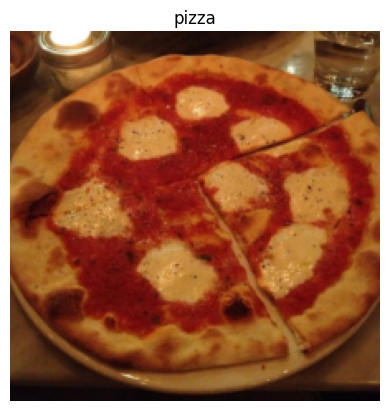

In [20]:
# Plot image with matplotlib 
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)

The image is loaded and displayed clearly , Now it's time to focus on the paper ...